<a href="https://colab.research.google.com/github/tomdaler/Machine-Learning/blob/main/Regression/Lineal_Regression_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('housing.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

x1='housing_median_age'
y1='total_rooms'
z1='median_house_value'

X = df[[x1, y1]].values
y = df[z1].values.reshape(-1, 1)

STANDARD SCALER

In [ ]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

slr = LinearRegression()
slr.fit(X_std, y_std)


LinearRegression()

In [ ]:
import numpy as np

age =20
rooms = 1000

v1 = np.array([rooms,age]).reshape(1,-1)

value = sc_y.inverse_transform(slr.predict(v1))
value

array([[21113720.27399826]])

In [ ]:
data = pd.DataFrame(X)
data.columns=['Age','Rooms']
data['Valor'] = y

In [ ]:
import plotly.express as px
px.scatter_3d(data, x='Age', y='Rooms', z='Valor', opacity=0.5)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



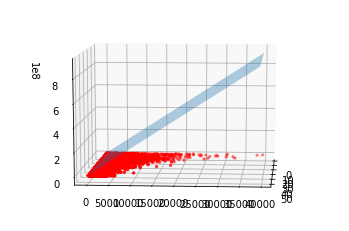

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import *
import numpy as np 

x1_range = np.arange(df[x1].min(),df[x1].max())
x2_range = np.arange(df[y1].min(),df[y1].max())

X1, X2 = np.meshgrid(x1_range,x2_range)

plano = pd.DataFrame({x1:X1.ravel(), y1:X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1,X2,pred, alpha=0.4)

ax.scatter3D(df[x1], df[y1], df[z1], color='R', marker='.')

#ROTARLO
ax.view_init(elev=10,azim=4)

plt.show();
